In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

 *Loading the data file*

In [2]:
telco_base_data = pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
telco_base_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
telco_base_data.shape

(7043, 21)

In [5]:
telco_base_data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [6]:
telco_base_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
telco_base_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


75% customers have tenure less than 55 months

Average monthly charges are USD 64.76 whereas 25% customers pay more than USD 89.85 per month

Text(0.5, 1.0, 'Count of target variable per category')

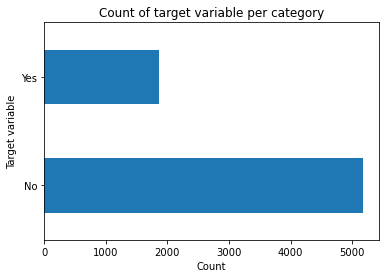

In [8]:
telco_base_data['Churn'].value_counts().plot(kind = 'barh')
plt.xlabel('Count')
plt.ylabel('Target variable')
plt.title('Count of target variable per category')

In [9]:
100 * telco_base_data['Churn'].value_counts()/ len(telco_base_data['Churn'])

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

Data is highly imbalanced, ratio = 73:27

In [10]:
telco_base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


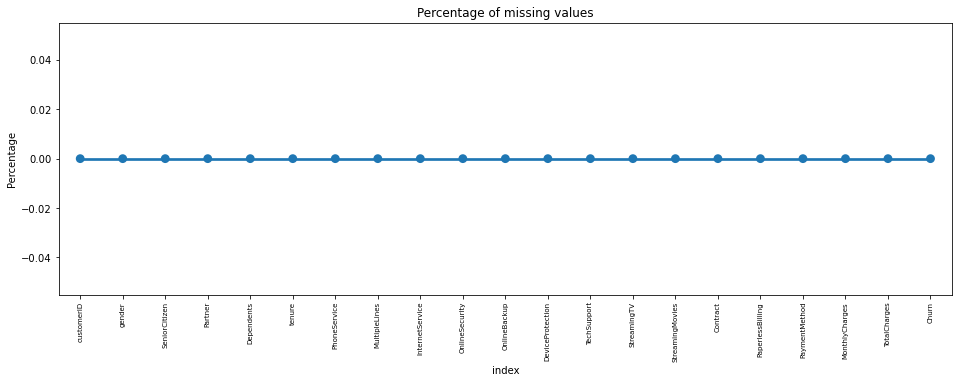

In [11]:
missing = pd.DataFrame((telco_base_data.isnull().sum()*100/telco_base_data.shape[0])).reset_index()
plt.figure(figsize = (16,5))
ax = sns.pointplot(x = 'index', y = 0, data = missing)
plt.xticks(rotation = 90, fontsize = 7)
plt.title('Percentage of missing values')
plt.ylabel('Percentage')
plt.show()

### Data Cleaning

In [12]:
telco_data = telco_base_data.copy()

Total charges should be numeric amount. Converting it to numerical data type

In [13]:
telco_data.TotalCharges = pd.to_numeric(telco_data.TotalCharges, errors = 'coerce')
telco_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

We can see 11 missing values in TotalCharges. Let's check these records

In [14]:
telco_data.loc[telco_data['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Since % of these records is very low ie 0.15%, it is safe to ignore them from further processing

In [15]:
#Removing missing values

telco_data.dropna(how = 'any', inplace = True)

In [16]:
#droping column customerID

telco_data.drop('customerID', axis = 1, inplace = True)

#### Data Exploration

<AxesSubplot:xlabel='gender', ylabel='count'>

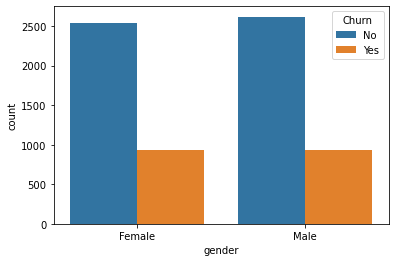

In [17]:
sns.countplot(x = 'gender', data = telco_data, hue = 'Churn')

From the above graph, we can see that gender is not a contributing factor for customer churn

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

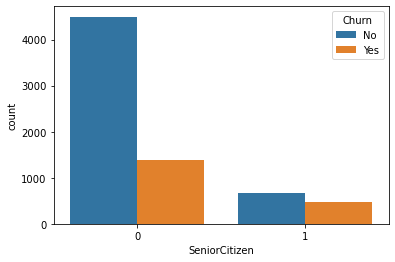

In [18]:
sns.countplot(x = 'SeniorCitizen', data = telco_data, hue = 'Churn')

We can see Seniorcitizen are getting more likely Churned compared to non Seniorcitizen ratio

<AxesSubplot:xlabel='Partner', ylabel='count'>

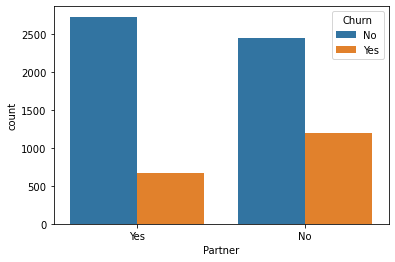

In [19]:
sns.countplot(x = 'Partner', data = telco_data, hue = 'Churn')

If customer is not having a partner, more likely to churn

<AxesSubplot:xlabel='Dependents', ylabel='count'>

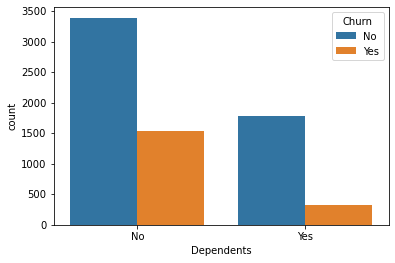

In [20]:
sns.countplot(x = 'Dependents', data = telco_data, hue = 'Churn')

Customer having dependents less likely to churn

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

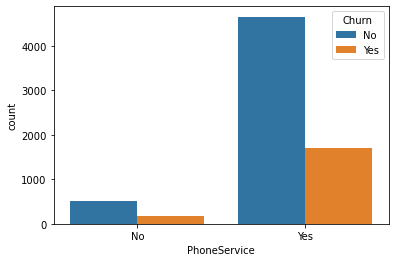

In [21]:
sns.countplot(x = 'PhoneService', data = telco_data, hue = 'Churn')

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

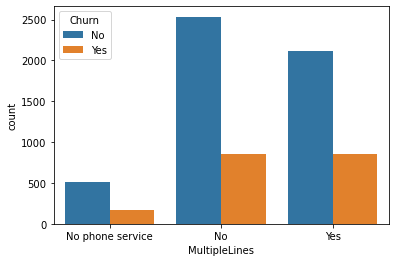

In [22]:
sns.countplot(x = 'MultipleLines', data = telco_data, hue = 'Churn')

<AxesSubplot:xlabel='InternetService', ylabel='count'>

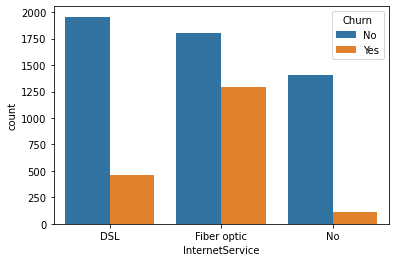

In [23]:
sns.countplot(x = 'InternetService', data = telco_data, hue = 'Churn')

Customer having Fiber optic service have a high churn percentage. This shows that company needs to improve their Fibre optic service.

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

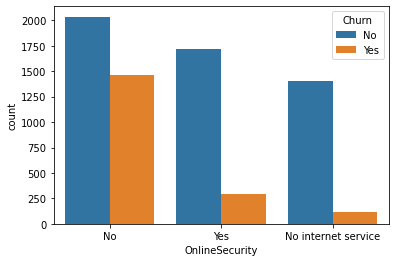

In [24]:
sns.countplot(x = 'OnlineSecurity', data = telco_data, hue = 'Churn')

With no OnlineSecurity, Churn percentage is high

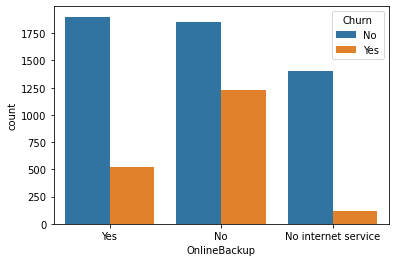

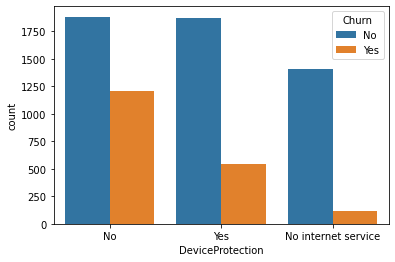

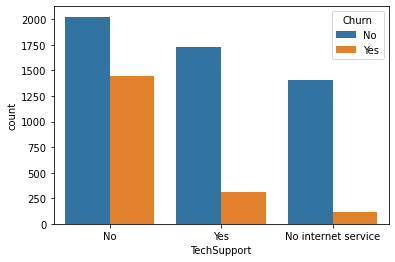

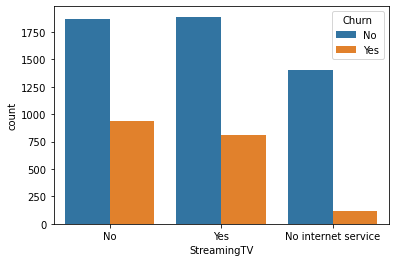

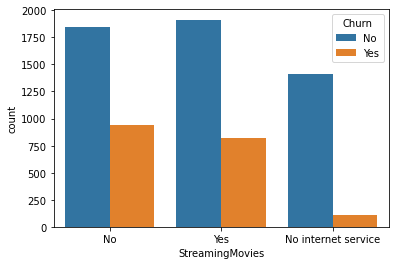

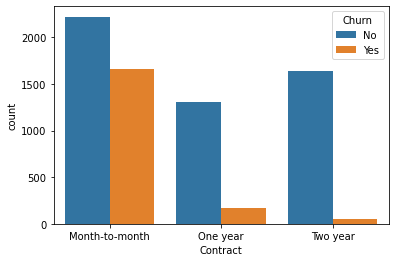

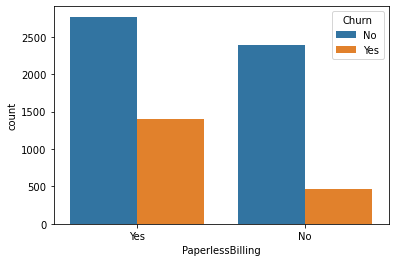

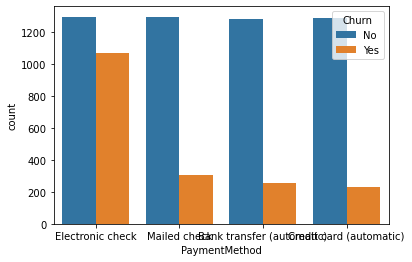

In [25]:
Columns = ['OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
           'PaperlessBilling','PaymentMethod']

for i, predictor in enumerate(Columns):
    plt.figure(i)
    sns.countplot(x = predictor, data = telco_data, hue = 'Churn')

Some of the quick insights from this exercise:

 1.Electronic check medium are the highest churners
 
 2.Contract type - Monthly customers are more likely to churn
 
 3.No Online backup, no Device protection, no Tech Support category customers are high churners

##### Tackling numeric data 

[Text(0.5, 0, 'Tenure in Months')]

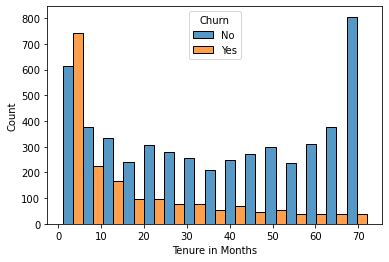

In [26]:
ax = sns.histplot(x = 'tenure', hue = 'Churn', data = telco_data, multiple = 'dodge')
ax.set(xlabel = 'Tenure in Months')

The churn amount is higher in the initial 5 months, which is usually the time when new customers try out and decide whether to continue or cancel the service.

And also, the customers who do not churn, tends to stay for a longer tenure with the telecom company

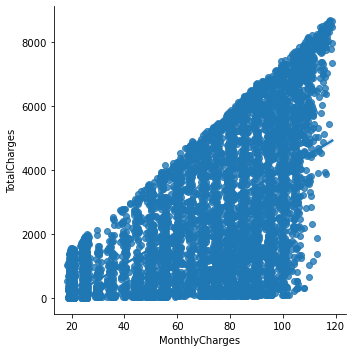

In [27]:
#Relationship between Monthly Charges and Total charges

sns.lmplot(x = 'MonthlyCharges', y = 'TotalCharges', data = telco_data)

Total charges increases as Monthly charges increases - as expected

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

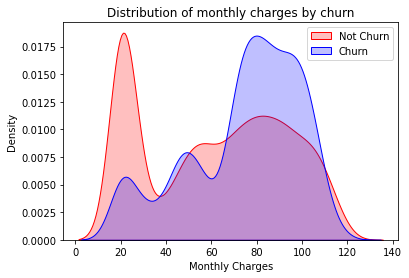

In [28]:
ax = sns.kdeplot(telco_data.MonthlyCharges[(telco_data["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(telco_data.MonthlyCharges[(telco_data["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

Higher % of customers churn when the monthly charges are high.

Text(0.5, 1.0, 'Distribution of total charges by churn')

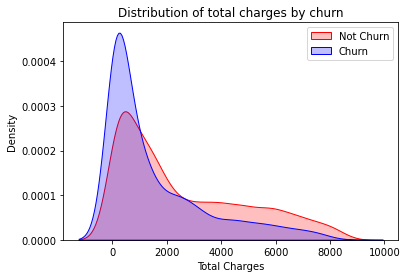

In [29]:
ax = sns.kdeplot(telco_data.TotalCharges[(telco_data["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(telco_data.TotalCharges[(telco_data["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of total charges by churn')

*Surprising insight* as higher Churn at lowest Total Charges

However, if we combine the insights of three parameters i.e Tenure, Monthly Charges & Total Charges then

Higher Monthly Charges at lower tenure results into lower Total Charges 

Hence, all these 3 factors are linked to High Churn

In [30]:
#Converting Target variable 'Churn' in a binary numeric variable

telco_data['Churn'] = telco_data['Churn'].map({'Yes' : 1, 'No' : 0})

In [31]:
telco_data.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0


##### Converting categorical variables into dummy variables

In [32]:
telco_data_dummies = pd.get_dummies(telco_data)
telco_data_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


<AxesSubplot:>

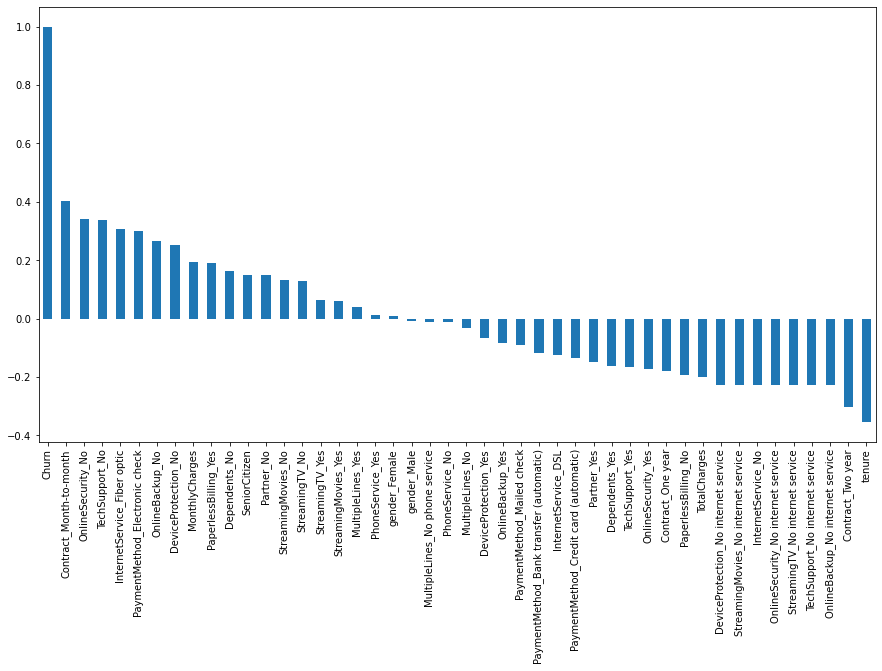

In [33]:
#Get Correlation of "Churn" with other variables:

plt.figure(figsize=(15,8))
telco_data_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind = 'bar')

Month to month contracts, absence of online security and tech support seem to be positively correlated with churn. While, tenure, two year contracts seem to be negatively correlated with churn.

Interestingly, services such as Online security, streaming TV, online backup, tech support, etc. without internet connection seem to be negatively related to churn.

Factors like Gender, Availabilty of PhoneService and Multiplelines have almost no impact on Churn.

<AxesSubplot:>

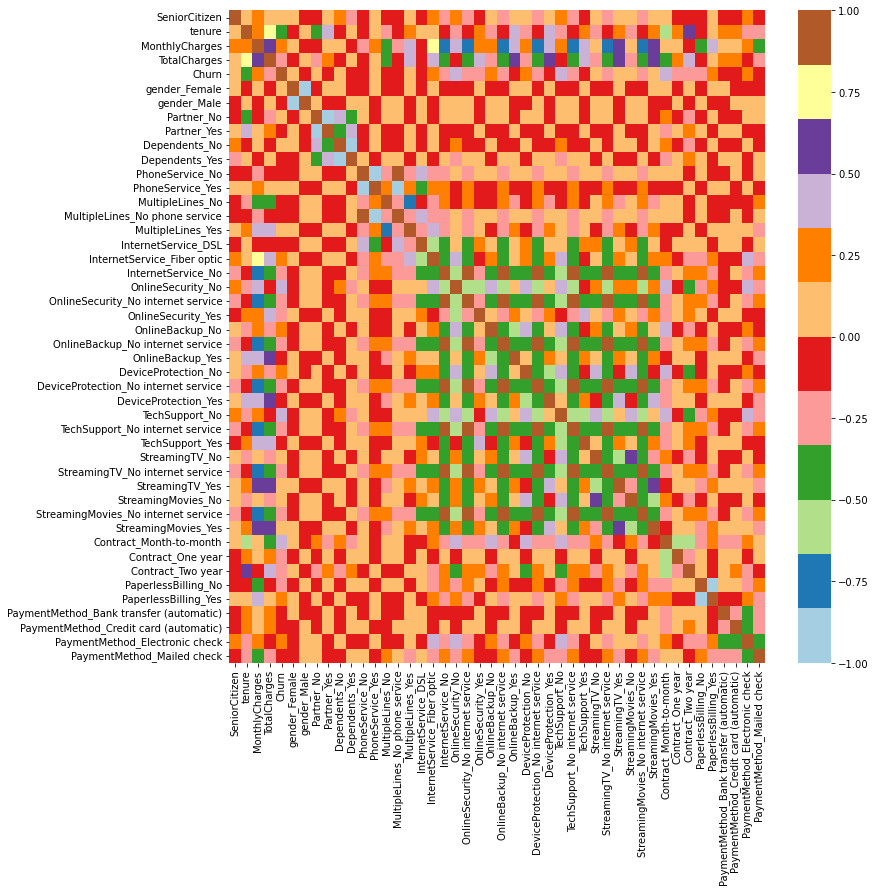

In [34]:
plt.figure(figsize = (12,12))
sns.heatmap(telco_data_dummies.corr(), cmap = 'Paired')

#### Scaling

In [35]:
X = telco_data_dummies.drop('Churn', axis = 1)
y = telco_data_dummies['Churn']

In [36]:
from sklearn.preprocessing import MinMaxScaler

features = X.columns.values
scaler = MinMaxScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.000000,0.115423,0.001275,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.464789,0.385075,0.215867,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.014085,0.354229,0.010310,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.619718,0.239303,0.210241,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.014085,0.521891,0.015330,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


##### Creating a model 

In [46]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imblearn.combine import SMOTEENN

In [47]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

#### Decision Tree Classifier 

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
model_dt = DecisionTreeClassifier(criterion = 'gini', random_state = 100, max_depth = 6, min_samples_leaf = 8)

In [51]:
model_dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [52]:
y_pred = model_dt.predict(x_test)

In [53]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [55]:
model_dt.score(x_test, y_test)

0.7803837953091685

In [59]:
print(classification_report(y_test, y_pred, labels = [0,1]))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1016
           1       0.61      0.58      0.60       391

    accuracy                           0.78      1407
   macro avg       0.73      0.72      0.72      1407
weighted avg       0.78      0.78      0.78      1407



In [60]:
confusion_matrix(y_test, y_pred)

array([[870, 146],
       [163, 228]], dtype=int64)

As we can see the accuracy is quite low, and as it's an imbalanced dataset, Accuracy is cursed.

Hence moving ahead to call SMOTEENN(UpSampling + ENN)

In [68]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_sample(X,y)

In [69]:
xr_train, xr_test, yr_train, yr_test = train_test_split(X_resampled,y_resampled, test_size = 0.2)

In [70]:
model_dt_smote = DecisionTreeClassifier(criterion = 'gini', random_state = 100, max_depth = 6, min_samples_leaf = 8)

In [71]:
model_dt.fit(xr_train, yr_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [72]:
y_pred_smote = model_dt.predict(xr_test)

In [73]:
print(classification_report(yr_test, y_pred_smote, labels = [0,1]))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       530
           1       0.92      0.95      0.94       706

    accuracy                           0.92      1236
   macro avg       0.93      0.92      0.92      1236
weighted avg       0.93      0.92      0.92      1236



In [74]:
print(confusion_matrix(yr_test, y_pred_smote))

[[469  61]
 [ 32 674]]


Now we can see quite better results i.e Accuracy of 92% 

#### Random Forest Classifier

In [113]:
from sklearn.ensemble import RandomForestClassifier

In [114]:
model_rf = RandomForestClassifier(n_estimators = 100,criterion = 'gini', random_state = 100, max_depth = 6, min_samples_leaf = 8)
model_rf.fit(x_train, y_train)
y_pred_rf = model_rf.predict(x_test)

In [115]:
print(classification_report(y_test, y_pred_rf, labels = [0,1]))

              precision    recall  f1-score   support

           0       0.82      0.91      0.87      1016
           1       0.69      0.49      0.57       391

    accuracy                           0.80      1407
   macro avg       0.76      0.70      0.72      1407
weighted avg       0.79      0.80      0.79      1407



In [116]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_sample(X,y)

In [117]:
xr_train, xr_test, yr_train, yr_test = train_test_split(X_resampled,y_resampled, test_size = 0.2)

In [118]:
model_rf_smote = RandomForestClassifier(n_estimators=100, criterion = 'gini', random_state = 100, max_depth = 6, min_samples_leaf = 8)

In [119]:
model_rf.fit(xr_train, yr_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [120]:
y_pred_smote_rf = model_rf.predict(xr_test)

In [94]:
print(classification_report(yr_test, y_pred_smote_rf, labels = [0,1]))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       563
           1       0.94      0.95      0.94       655

    accuracy                           0.94      1218
   macro avg       0.94      0.93      0.93      1218
weighted avg       0.94      0.94      0.94      1218



In [95]:
print(confusion_matrix(yr_test, y_pred_smote_rf))

[[520  43]
 [ 36 619]]


###### Logistic Regression

In [96]:
from sklearn.linear_model import LogisticRegression

In [99]:
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(x_train, y_train)
y_pred_lr = model_lr.predict(x_test)

In [106]:
print(classification_report(y_test, y_pred_lr, labels = [0,1]))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1016
           1       0.67      0.55      0.60       391

    accuracy                           0.80      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.79      0.80      0.79      1407



In [100]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_sample(X,y)

In [101]:
xr_train, xr_test, yr_train, yr_test = train_test_split(X_resampled,y_resampled, test_size = 0.2)

In [102]:
model_lr_smote = LogisticRegression(max_iter=1000)

In [103]:
model_lr.fit(xr_train, yr_train)

LogisticRegression(max_iter=1000)

In [104]:
y_pred_smote_lr = model_lr.predict(xr_test)

In [105]:
print(classification_report(yr_test, y_pred_smote_lr, labels = [0,1]))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       560
           1       0.91      0.93      0.92       662

    accuracy                           0.91      1222
   macro avg       0.91      0.91      0.91      1222
weighted avg       0.91      0.91      0.91      1222



In [107]:
print(confusion_matrix(yr_test, y_pred_smote_lr))

[[496  64]
 [ 48 614]]


Implemented different algorithms like Decision Tree, Random Forest and Logistic Regression.

Achieved a best score of 0.94 with Random Forest model.

##### Pickling the model 

In [108]:
import pickle

In [109]:
filename = 'model_churn.save'

In [110]:
pickle.dump(model_rf_smote, open(filename, 'wb'))

In [111]:
load_model = pickle.load(open(filename, 'rb'))

In [122]:
load_model.fit(xr_train, yr_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [123]:
load_model.score(xr_test, yr_test)

0.9408427876823339

Our final model i.e. RF Classifier with SMOTEENN, is now ready and dumped in 'model_churn.save'